In [1]:
#Dependences 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Take in all of our CitiBike data and read it into pandas
jan_2019 = "../Resources/JC-201901-citibike-tripdata 4 2.csv"
feb_2019 = "../Resources/JC-201902-citibike-tripdata.csv"
mar_2019 = "../Resources/JC-201903-citibike-tripdata.csv"
apr_2019 = "../Resources/JC-201904-citibike-tripdata.csv"
may_2019 = "../Resources/JC-201905-citibike-tripdata.csv"
june_2019 = "../Resources/JC-201906-citibike-tripdata.csv"
july_2019 = "../Resources/JC-201907-citibike-tripdata.csv"
aug_2019 = "../Resources/JC-201908-citibike-tripdata 2.csv"

#Create DataFrames for all the data files
jan_2019_df = pd.read_csv(jan_2019)
feb_2019_df = pd.read_csv(feb_2019)
mar_2019_df = pd.read_csv(mar_2019)
apr_2019_df = pd.read_csv(apr_2019)
may_2019_df = pd.read_csv(may_2019)
june_2019_df = pd.read_csv(june_2019)
july_2019_df = pd.read_csv(july_2019)
aug_2019_df = pd.read_csv(aug_2019)

In [3]:
#Merge all data from 2019 into one big data frame 
combined2019_CityBike_df = pd.merge(jan_2019_df, feb_2019_df, how='outer')
combined2019_CityBike_df3 = pd.merge(combined2019_CityBike_df,mar_2019_df, how = "outer")
combined2019_CityBike_df4 = pd.merge(combined2019_CityBike_df3,apr_2019_df, how = "outer")
combined2019_CityBike_df5 = pd.merge(combined2019_CityBike_df4,may_2019_df, how = "outer")
combined2019_CityBike_df6 = pd.merge(combined2019_CityBike_df5,june_2019_df, how = "outer")
combined2019_CityBike_df7 = pd.merge(combined2019_CityBike_df6,july_2019_df, how = "outer")
combined2019_CityBike_df8 = pd.merge(combined2019_CityBike_df7,aug_2019_df, how = "outer")

combined2019_CityBike_df8

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262920,384,2019-08-31 23:40:45.2450,2019-08-31 23:47:09.8810,3639,Harborside,40.719252,-74.034234,3203,Hamilton Park,40.727596,-74.044247,29522,Subscriber,1988,1
262921,633,2019-08-31 23:45:55.6660,2019-08-31 23:56:29.5350,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,29679,Customer,1997,1
262922,324,2019-08-31 23:50:27.9220,2019-08-31 23:55:52.8420,3276,Marin Light Rail,40.714584,-74.042817,3211,Newark Ave,40.721525,-74.046305,26198,Subscriber,1997,2
262923,126,2019-08-31 23:52:21.9250,2019-08-31 23:54:28.5820,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,-74.050656,29512,Subscriber,1998,1


In [4]:
combined2019_CityBike_df8["gender"] = combined2019_CityBike_df8["gender"].map(str)
combined2019_CityBike_df8["gender"] = combined2019_CityBike_df8["gender"].replace(['Unk','M','F'],['Unknown','Male','Female'])

combined2019_CityBike_df8 = combined2019_CityBike_df8.rename(columns = {"tripduration": "tripduration (seconds)"})
combined2019_CityBike_df8

,tripduration (seconds),starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262920,384,2019-08-31 23:40:45.2450,2019-08-31 23:47:09.8810,3639,Harborside,40.719252,-74.034234,3203,Hamilton Park,40.727596,-74.044247,29522,Subscriber,1988,1
262921,633,2019-08-31 23:45:55.6660,2019-08-31 23:56:29.5350,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,29679,Customer,1997,1
262922,324,2019-08-31 23:50:27.9220,2019-08-31 23:55:52.8420,3276,Marin Light Rail,40.714584,-74.042817,3211,Newark Ave,40.721525,-74.046305,26198,Subscriber,1997,2
262923,126,2019-08-31 23:52:21.9250,2019-08-31 23:54:28.5820,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,-74.050656,29512,Subscriber,1998,1


In [7]:
#Total count of rides for 2019
total_rides= len(combined2019_CityBike_df8["tripduration (seconds)"])
print(f"There were a total of {total_rides} rides between January 1, 2019 through August 31,2019")

There were a total of 262925 rides between January 1, 2019 through August 31,2019


In [54]:
# Create bins in which to place values based upon birth year
bins = [1900, 1946, 1964, 1979, 1994, 2015]
# Create labels for these bins
bin_labels = ["1900-1945", "1946-1964", "1965-1979", "1980-1994", "1995-2015"]

#Create a new column for which been each row falls into
combined2019_CityBike_df8["binned"] = pd.cut(combined2019_CityBike_df8["birth year"], bins)

#Get the value count for each bin group
bin_count = pd.cut(combined2019_CityBike_df8["birth year"], bins=bins).value_counts()

#Group by the binned column 
bin_group = combined2019_CityBike_df8.groupby("binned")

#Print the number of values in each bin group 
print(bin_group["birth year"].count())

binned
(1900, 1946]       134
(1946, 1964]     19405
(1964, 1979]     71396
(1979, 1994]    161815
(1994, 2015]     10079
Name: birth year, dtype: int64


Text(0, 0.5, 'Number of User')

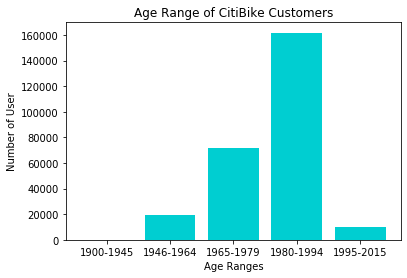

In [80]:
#Set the x and y axis
x_axis = bin_labels 
y = bin_group["birth year"].count()
#Create the bar chart 
plt.bar(x_axis, y, color = "darkturquoise")

#Set the labels and title
plt.title("Age Range of CitiBike Customers")
plt.xlabel("Age Ranges")
plt.ylabel("Number of User")